In [17]:
import numpy as np
import os

import PIL as pl

import matplotlib.pyplot as plt

from PIL import ImageFilter
from PIL import Image


import pandas as pd


%matplotlib inline

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (14,10)

In [2]:
# Where the images are stored

raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

In [5]:
cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

In [7]:


test_img = Image.open( raw_dir+cup_dir+cup_image_name_list[0] )

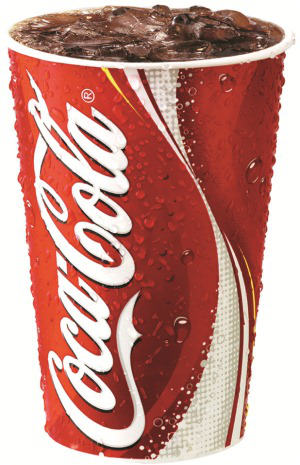

In [12]:
test_img

In [9]:
print test_img.format, test_img.size, test_img.mode

JPEG (300, 465) RGB


In [10]:
r,g,b = test_img.split()

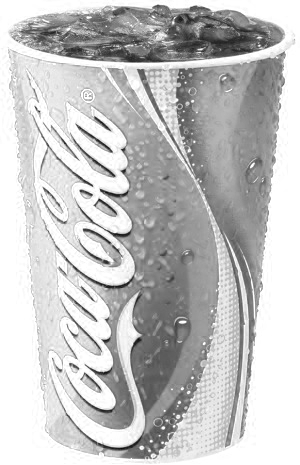

In [11]:
r

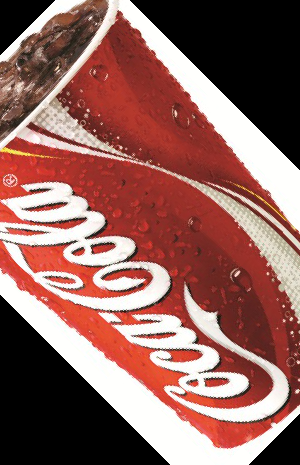

In [14]:
test_img.rotate(45)

In [27]:
foo = np.array(test_img.getdata())
pix_r = foo[:,0].reshape( test_img.size )
pix_g = foo[:,1].reshape( test_img.size )
pix_b = foo[:,2].reshape( test_img.size )

In [28]:
#  large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP

In [34]:
basewidth = 500

wpercent = (basewidth/float(test_img.size[0]))

hsize = int((float(test_img.size[1])*float(wpercent)))

resized_img = test_img.resize((basewidth,hsize), Image.ANTIALIAS)

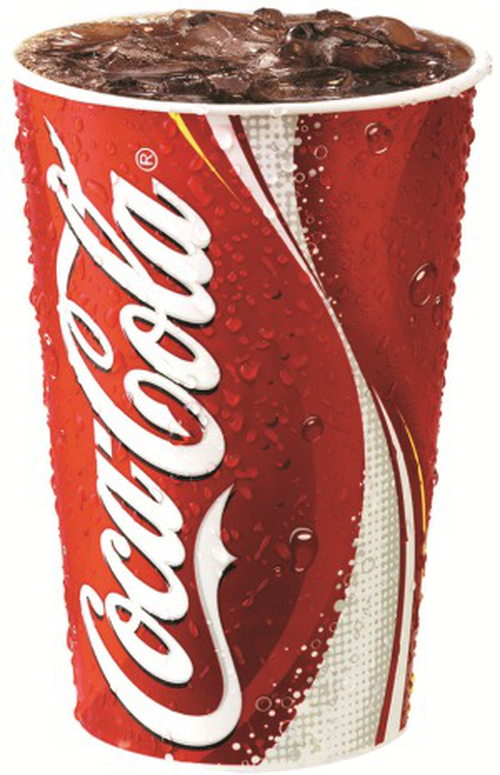

In [35]:
resized_img

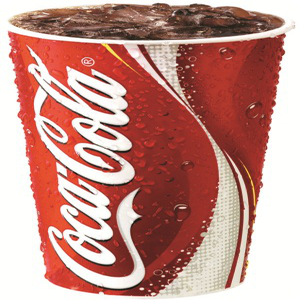

In [37]:
test_img.resize((300,300), Image.ANTIALIAS)

In [4]:
# Do pooling
def pool_arr( inp_arr, grid_size=2, stride=2, kind='max' ):
    
    # Must be max, min, or avg
    kind = kind.lower()
    if  not ( 
             kind == 'max' or
             kind == 'min' or
             kind == 'avg' or
             kind == 'med'
            ):
        raise ValueError('kind must be max, min, med, or avg')
    
    # Operation
    o_dict = {'max':np.max,'min':np.min,'avg':np.average,'med':np.median}
    
    # Starting pixel size
    pix_0 = inp_arr.shape[0]
    pix_1 = inp_arr.shape[1]
    
    # Find resultant image size, save original size
    new_pix_0 = pix_0//stride
    new_pix_1 = pix_1//stride
    
    # Create new output image
    new_img = np.zeros( [new_pix_0,
                         new_pix_1] )

    # Loop over img and do the pooling
    # Will perform whatever function the user provided
    for     i in range( 0, new_pix_0 ):
        for j in range( 0, new_pix_1 ):


            new_img[i,j] = o_dict[kind]( 
                                        inp_arr[ 
                                                i*stride:i*stride+grid_size,
                                                j*stride:j*stride+grid_size
                                               ] 
                                       )
    
    return new_img

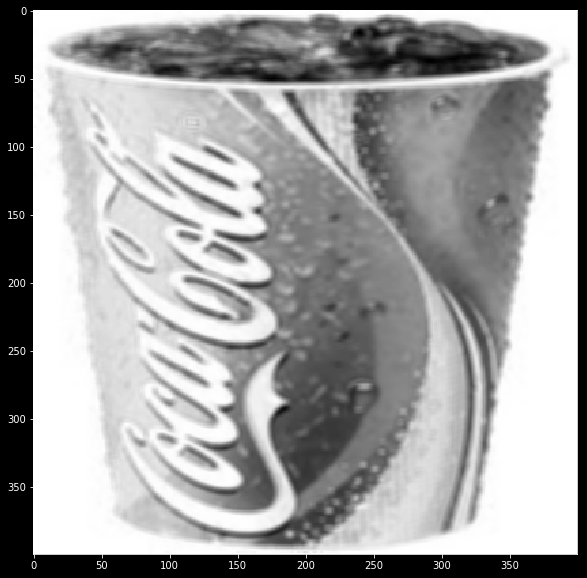

In [94]:
plt.imshow(r_pix,cmap=plt.cm.gray)

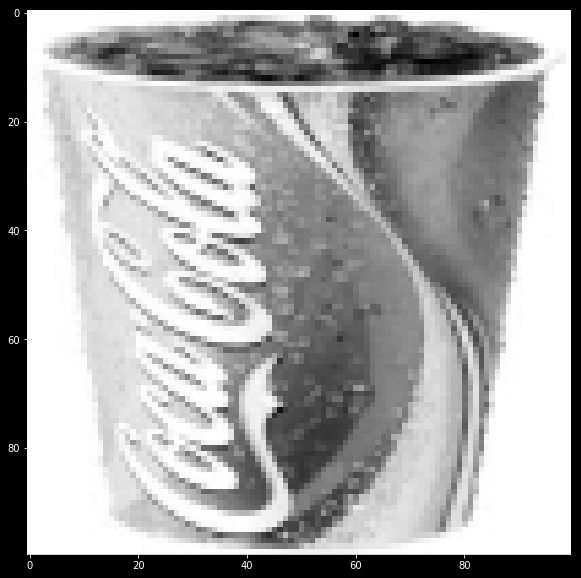

In [108]:
plt.imshow(foo,cmap=plt.cm.gray)

In [11]:
force_height = 400
force_width  = force_height
pool_grid    = 20
pool_stride  = 20

raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

file_name = cup_image_name_list[0]

raw_img = Image.open( raw_dir+cup_dir+file_name )

First thing to do is read in values, resize so workable, and break into channels. Forced size will be 400x400

In [12]:
resized_img = raw_img.resize((force_width,force_height),Image.ANTIALIAS)

Next, blur the image

In [13]:
from PIL import ImageFilter

# Do 5x5 kernel blurring
blurred_img = resized_img.filter( ImageFilter.Kernel( [5,5], np.ones(25) ) )

Break into channels

In [14]:
img_val_arr = np.array( blurred_img.getdata() )
pix_shape   = blurred_img.size
r_pix = img_val_arr[:,0].reshape( pix_shape )
g_pix = img_val_arr[:,1].reshape( pix_shape )
b_pix = img_val_arr[:,2].reshape( pix_shape )

Try pooling to resize

In [15]:
new_pix = []
for channel in [r_pix,g_pix,b_pix]:
    new_pix.append( pool_arr( channel, grid_size=pool_grid, stride=pool_stride ) )
r_pooled = new_pix[0]
g_pooled = new_pix[1]
b_pooled = new_pix[2]

Translate & Rotate, saving to df

In [30]:
cols = ['name','translation','rotation',]

for color in ['r','g','b']:
    for i in range( 0, r_pooled.shape[0]*r_pooled.shape[1] ):
        cols.append( color+'_pix_'+str(i) )

out_df = pd.DataFrame( columns=cols )

In [31]:
# Do this twice, once for transposed once for not
for translated in range( 0, 2 ):
        
        
    # Rotate the images, this will rotate on different
    # iterations, creating 4 orientations
    for rot in range( 0, 4 ):
        
        # Stores pixel values for this rotation
        val_list = []
        
        for arr in [r_pooled,g_pooled,b_pooled]:
            
            for rotation in range(0,rot):
                arr = np.rot90( arr )
            
            arr = arr.reshape(1,-1)[0].tolist()
            
            val_list = val_list + arr
            
        
        # Combines pixels with metadata
        frame_entries = [file_name,translated,rot*90] + val_list
        
        
        out_row = out_df.shape[0]
        out_df.loc[out_row] = np.array( frame_entries )

In [41]:
force_height = 400
force_width  = force_height
pool_grid    = 20
pool_stride  = 20



cols = ['name','translation','rotation',]

for color in ['r','g','b']:
    for i in range( 0, (force_height//pool_stride)*(force_width//pool_stride) ):
        cols.append( color+'_pix_'+str(i) )

out_df = pd.DataFrame( columns=cols )



raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

for iii in range(0,2):
    file_name = cup_image_name_list[iii]

    raw_img = Image.open( raw_dir+cup_dir+file_name )

    resized_img = raw_img.resize((force_width,force_height),Image.ANTIALIAS)



    # Do 5x5 kernel blurring
    blurred_img = resized_img.filter( ImageFilter.Kernel( [5,5], np.ones(25) ) )


    img_val_arr = np.array( blurred_img.getdata() )
    pix_shape   = blurred_img.size
    r_pix = img_val_arr[:,0].reshape( pix_shape )
    g_pix = img_val_arr[:,1].reshape( pix_shape )
    b_pix = img_val_arr[:,2].reshape( pix_shape )


    new_pix = []
    for channel in [r_pix,g_pix,b_pix]:
        new_pix.append( pool_arr( channel, grid_size=4, stride=4 ) )
    r_pooled = new_pix[0]
    g_pooled = new_pix[1]
    b_pooled = new_pix[2]


    # Do this twice, once for transposed once for not
    for translated in range( 0, 2 ):


        # Rotate the images, this will rotate on different
        # iterations, creating 4 orientations
        for rot in range( 0, 4 ):

            # Stores pixel values for this rotation
            val_list = []

            for arr in [r_pooled,g_pooled,b_pooled]:

                for rotation in range(0,rot):
                    arr = np.rot90( arr )

                arr = arr.reshape(1,-1)[0].tolist()

                print len(arr)
                
                val_list = val_list + arr


            # Combines pixels with metadata
            frame_entries = [file_name,translated,rot*90] + val_list


            out_row = out_df.shape[0]
            print out_df.shape[0], out_df.shape, len(frame_entries)
            out_df.loc[out_row] = np.array( frame_entries )

10000
10000
10000
0 (0, 1203) 30003


ValueError: cannot set a row with mismatched columns

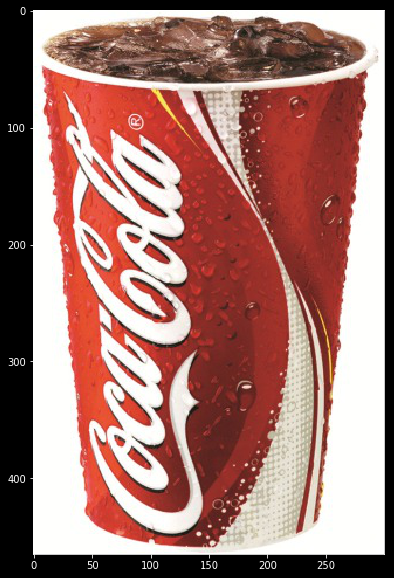

In [35]:
plt.imshow( raw_img )